In [27]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



import numpy as np
import matplotlib.pyplot as plt

def visualize_classifier(classifier, X, y):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()



In [14]:
import argparse 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

def build_arg_parser():
    parser = argparse.ArgumentParser(description='Classify data using \
            Ensemble Learning techniques')
    parser.add_argument('--classifier-type', dest='classifier_type', 
            required=True, choices=['rf', 'erf'], help="Type of classifier \
                    to use; can be either 'rf' or 'erf'")
    return parser

if __name__=='__main__':
    # Parse the input arguments
    args = build_arg_parser().parse_args()
    classifier_type = args.classifier_type
   

usage: ipykernel_launcher.py [-h] --classifier-type {rf,erf}
ipykernel_launcher.py: error: the following arguments are required: --classifier-type


SystemExit: 2

In [10]:
 
#from utilities import visualize_classifier

# Argument parser 



    # Load input data
    input_file = 'data_random_forests.txt'
    data = np.loadtxt(input_file, delimiter=',')
    X, y = data[:, :-1], data[:, -1]

    
    
    # Separate input data into three classes based on labels
    class_0 = np.array(X[y==0])
    class_1 = np.array(X[y==1])
    class_2 = np.array(X[y==2])

    # Visualize input data
    plt.figure()
    plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='white', 
                    edgecolors='black', linewidth=1, marker='s')
    plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
                    edgecolors='black', linewidth=1, marker='o')
    plt.scatter(class_2[:, 0], class_2[:, 1], s=75, facecolors='white', 
                    edgecolors='black', linewidth=1, marker='^')
    plt.title('Input data')

    # Split data into training and testing datasets 
    X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.25, random_state=5)

   

SystemExit: 2

In [ ]:
 # Ensemble Learning classifier
    params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
    if classifier_type == 'rf':
        classifier = RandomForestClassifier(**params)
    else:
        classifier = ExtraTreesClassifier(**params)

    classifier.fit(X_train, y_train)
    visualize_classifier(classifier, X_train, y_train, 'Training dataset')

    y_test_pred = classifier.predict(X_test)
    visualize_classifier(classifier, X_test, y_test, 'Test dataset')

    # Evaluate classifier performance
    class_names = ['Class-0', 'Class-1', 'Class-2']
    print("\n" + "#"*40)
    print("\nClassifier performance on training dataset\n")
    print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
    print("#"*40 + "\n")

    print("#"*40)
    print("\nClassifier performance on test dataset\n")
    print(classification_report(y_test, y_test_pred, target_names=class_names))
    print("#"*40 + "\n")

    # Compute confidence
    test_datapoints = np.array([[5, 5], [3, 6], [6, 4], [7, 2], [4, 4], [5, 2]])

    print("\nConfidence measure:")
    for datapoint in test_datapoints:
        probabilities = classifier.predict_proba([datapoint])[0]
        predicted_class = 'Class-' + str(np.argmax(probabilities))
        print('\nDatapoint:', datapoint)
        print('Predicted class:', predicted_class) 

    # Visualize the datapoints
    visualize_classifier(classifier, test_datapoints, [0]*len(test_datapoints), 
            'Test datapoints')

    plt.show()

# HOUSING DATA

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



import os as os
url = 'C:\\Users\\HP\\OneDrive\\GitHub\\Artificial-Intelligence-with-Python\\Chapter 02\\code\\'


    
    
import numpy as np
from sklearn import datasets
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle

# Load housing data
data = datasets.load_boston() 

# Shuffle the data
X, y = shuffle(data.data, data.target, random_state=7)

# Split the data into training and testing datasets 
num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

# Create Support Vector Regression model
sv_regressor = SVR(kernel='linear', C=1.0, epsilon=0.1)

# Train Support Vector Regressor
sv_regressor.fit(X_train, y_train)

# Evaluate performance of Support Vector Regressor
y_test_pred = sv_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
evs = explained_variance_score(y_test, y_test_pred) 
print("\n#### Performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

# Test the regressor on test datapoint
test_data = [3.7, 0, 18.4, 1, 0.87, 5.95, 91, 2.5052, 26, 666, 20.2, 351.34, 15.27]
print("\nPredicted price:", sv_regressor.predict([test_data])[0])



#### Performance ####
Mean squared error = 15.38
Explained variance score = 0.82

Predicted price: 18.521780107258536


# DATA PROCESSING

In [2]:
import numpy as np
from sklearn import preprocessing

input_data = np.array([[5.1, -2.9, 3.3],
                       [-1.2, 7.8, -6.1],
                       [3.9, 0.4, 2.1],
                       [7.3, -9.9, -4.5]])

# Binarize data 
data_binarized = preprocessing.Binarizer(threshold=2.1).transform(input_data)
print("\nBinarized data:\n", data_binarized)

# Print mean and standard deviation
print("\nBEFORE:")
print("Mean =", input_data.mean(axis=0))
print("Std deviation =", input_data.std(axis=0))

# Remove mean
data_scaled = preprocessing.scale(input_data)
print("\nAFTER:")
print("Mean =", data_scaled.mean(axis=0))
print("Std deviation =", data_scaled.std(axis=0))

# Min max scaling
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
print("\nMin max scaled data:\n", data_scaled_minmax)

# Normalize data
data_normalized_l1 = preprocessing.normalize(input_data, norm='l1')
data_normalized_l2 = preprocessing.normalize(input_data, norm='l2')
print("\nL1 normalized data:\n", data_normalized_l1)
print("\nL2 normalized data:\n", data_normalized_l2)




Binarized data:
 [[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]

BEFORE:
Mean = [ 3.775 -1.15  -1.3  ]
Std deviation = [3.12039661 6.36651396 4.0620192 ]

AFTER:
Mean = [1.11022302e-16 0.00000000e+00 2.77555756e-17]
Std deviation = [1. 1. 1.]

Min max scaled data:
 [[0.74117647 0.39548023 1.        ]
 [0.         1.         0.        ]
 [0.6        0.5819209  0.87234043]
 [1.         0.         0.17021277]]

L1 normalized data:
 [[ 0.45132743 -0.25663717  0.2920354 ]
 [-0.0794702   0.51655629 -0.40397351]
 [ 0.609375    0.0625      0.328125  ]
 [ 0.33640553 -0.4562212  -0.20737327]]

L2 normalized data:
 [[ 0.75765788 -0.43082507  0.49024922]
 [-0.12030718  0.78199664 -0.61156148]
 [ 0.87690281  0.08993875  0.47217844]
 [ 0.55734935 -0.75585734 -0.34357152]]


# NAIVE BAYESIAN CLASSIFICATION

The objective of classification is to classify the data record into one of the predetermined classes. 
Classification is one of the most used machine learning approaches and there are several well-established state of art methods it. These include logistic regression, suport vector machine, random forest and neuro network models. With sufficient labeled training data, these models can achieved accuracies greater than 95% for many practical problems. 


Naive Bayes Classifier is a classification algorithm based on Bayes’ Theorem of probability. It is based on the principle that the predictors are independent of each other.
In other words, we can say that the Naive Bayes classifier assumes that the presence of a particular feature in a class is independent with the presence of any other feature in the same class. 

The Baysesian assumes the propability of a particular feature $X_{i}$ is dependent of any other feature $X_{j} (j \ne i)$ given the class label L_{k}. This leads to the following:
$$P(X_{i}|L_{k},X_{j}) = P(X_{i}|L_{k})$$

According Bayses rule, we can show that the probaility of class L_{k}, given feature set ${X_{1},X_{2},...,X_{n}}$ is the follows:
$$P(L_{k}|{X_{1},X_{2},...,X_{n}}) = \frac{1}{P(X_{1},X_{2},...,X_{n})}P(L_{k})\prod_{i=1}^N{P(X_{i}|L_{k})}$$
or
$$P(L_{k}|{X_{1},X_{2},...,X_{n}}) \ \infty  \ P(L_{k})\prod_{i=1}^N{P(X_{i}|L_{k})}$$

The classider select a class label that maximizes the posterior classis probability $P(L_{k}|{X_{1},X_{2},...,X_{n}})$ :

$$\hat{C}   = argmax{(P(L_{k})\prod_{i=1}^N{P(X_{i}|L_{k})})}  $$


Let $n_{i}$ be the number of times the feature $X_{i}$ occured in the class $L_k$ in the training dataset. Then, the likelihood function of observing a feature vector $X={\{X_{1},X_{2},...,X_{n}\}}$, given a class label $L_{k}$, is given by:


$$P({X_{1},X_{2},...,X_{n}}|L_{k}) = \frac{(\sum_{i}{n_i})!}{(\prod_{i}{n_i})!}    \prod_{i=1}^{N} P_{k_i}^{n_i}$$

Taking logarithm on both sides, we get the following:

$$\log{P(L_{k}|X)}=\log{P(L_k)}+\sum{(\log{p_{k_i}})n_i}$$
We can observe that posterior distribution, after a logalorith transformation, the initial problem was converted into a linear regression model with an intercept $b=log{p_{k_i}}$, which could be dertermined from the data. 







In [6]:
import numpy as np
from sklearn import linear_model 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#from utilities import visualize_classifier
from sklearn.naive_bayes import GaussianNB
def visualize_classifier(classifier, X, y):
# Define the minimum and maximum values for X and Y
# that will be used in the mesh grid
     min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
     min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

from sklearn.model_selection import cross_val_score



# Define sample input data
X = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5], [6, 5], [5.6, 5], [3.3, 0.4], [3.9, 0.9], [2.8, 1], [0.5, 3.4], [1, 4], [0.6, 4.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

# Create the logistic regression classifier
classifier = linear_model.LogisticRegression(solver='liblinear', C=1)
#classifier = linear_model.LogisticRegression(solver='liblinear', C=100)

# Train the classifier
classifier.fit(X, y)

# Visualize the performance of the classifier 
visualize_classifier(classifier, X, y)

###############################################
# Cross validation 

# Split data into training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
classifier_new = GaussianNB()
classifier_new.fit(X_train, y_train)
y_test_pred = classifier_new.predict(X_test)

# compute accuracy of the classifier
accuracy = 100.0 * (y_test == y_test_pred).sum() / X_test.shape[0]
print("Accuracy of the new classifier =", round(accuracy, 2), "%")

# Visualize the performance of the classifier
visualize_classifier(classifier_new, X_test, y_test)
###############################################
# Scoring functions

num_folds = 3
accuracy_values = cross_val_score(classifier, 
        X, y, scoring='accuracy', cv=num_folds)
print("Accuracy: " + str(round(100*accuracy_values.mean(), 2)) + "%")

precision_values = cross_val_score(classifier, 
        X, y, scoring='precision_weighted', cv=num_folds)
print("Precision: " + str(round(100*precision_values.mean(), 2)) + "%")

recall_values = cross_val_score(classifier, 
        X, y, scoring='recall_weighted', cv=num_folds)
print("Recall: " + str(round(100*recall_values.mean(), 2)) + "%")

f1_values = cross_val_score(classifier, 
        X, y, scoring='f1_weighted', cv=num_folds)
print("F1: " + str(round(100*f1_values.mean(), 2)) + "%")




LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

GaussianNB(priors=None, var_smoothing=1e-09)

Accuracy of the new classifier = 33.33 %
Accuracy: 91.67%
Precision: 87.5%
Recall: 91.67%
F1: 88.89%


In [19]:
import numpy as np
from sklearn import preprocessing

# Sample input labels
input_labels = ['red', 'black', 'red', 'green', 'black', 'yellow', 'white']

# Create label encoder and fit the labels
encoder = preprocessing.LabelEncoder()
encoder.fit(input_labels)
# Print the mapping 
print("\nLabel mapping:")
for i, item in enumerate(encoder.classes_):
    print(item, '-->', i)


# Encode a set of labels using the encoder
test_labels = ['green', 'red', 'black']
encoded_values = encoder.transform(test_labels)
print("\nLabels =", test_labels)
print("Encoded values =", list(encoded_values))




# Decode a set of values using the encoder
encoded_values = [3, 0, 4, 1]
decoded_list = encoder.inverse_transform(encoded_values)
print("\nEncoded values =", encoded_values)
print("Decoded labels =", list(decoded_list))

LabelEncoder()


Label mapping:
black --> 0
green --> 1
red --> 2
white --> 3
yellow --> 4

Labels = ['green', 'red', 'black']
Encoded values = [1, 2, 0]

Encoded values = [3, 0, 4, 1]
Decoded labels = ['white', 'black', 'yellow', 'green']


INCOME CLASSIFIER

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# Input file containing data
input_file = 'C:\\Users\\HP\\OneDrive\\GitHub\\Artificial-Intelligence-with-Python\\Chapter 02\\code\\income_data.txt'

# Read the data
X = []
y = []
count_class1 = 0
count_class2 = 0
max_datapoints = 25000

with open(input_file, 'r') as f:
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
            break

        if '?' in line:
            continue

        data = line[:-1].split(', ')

        if data[-1] == '<=50K' and count_class1 < max_datapoints:
            X.append(data)
            count_class1 += 1

        if data[-1] == '>50K' and count_class2 < max_datapoints:
            X.append(data)
            count_class2 += 1

# Convert to numpy array
X = np.array(X)

# Convert string data to numerical data
label_encoder = [] 
X_encoded = np.empty(X.shape)
for i,item in enumerate(X[0]):
    if item.isdigit(): 
        X_encoded[:, i] = X[:, i]
    else:
        label_encoder.append(preprocessing.LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])

X = X_encoded[:, :-1].astype(int)
y = X_encoded[:, -1].astype(int)

# Create SVM classifier
classifier = OneVsOneClassifier(LinearSVC(random_state=0))

# Train the classifier
classifier.fit(X, y)

# Cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
classifier = OneVsOneClassifier(LinearSVC(random_state=0))
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

# Compute the F1 score of the SVM classifier
f1 = cross_val_score(classifier, X, y, scoring='f1_weighted', cv=3)
print("F1 score: " + str(round(100*f1.mean(), 2)) + "%")

# Predict output for a test datapoint
input_data = ['37', 'Private', '215646', 'HS-grad', '9', 'Never-married', 'Handlers-cleaners', 'Not-in-family', 'White', 'Male', '0', '0', '40', 'United-States']

# Encode test datapoint
input_data_encoded = [-1] * len(input_data)
count = 0
for i, item in enumerate(input_data):
    if item.isdigit():
        input_data_encoded[i] = int(input_data[i])
    else:
        input_data_encoded[i] = int(label_encoder[count].transform(input_data[i]))
        count += 1 

input_data_encoded = np.array(input_data_encoded)

# Run classifier on encoded datapoint and print output
predicted_class = classifier.predict(input_data_encoded)
print(label_encoder[-1].inverse_transform(predicted_class)[0])

OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=None)

OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=None)

F1 score: 70.82%


ValueError: bad input shape ()

In [ ]:
with open(input_file, 'r') as f:
    for line in f.readlines():
        if count_class1 >= max_datapoints and count_class2 >= max_datapoints:
            break

        if '?' in line:
            continue

        data = line[:-1].split(', ')

        if data[-1] == '<=50K' and count_class1 < max_datapoints:
            X.append(data)
            count_class1 += 1

        if data[-1] == '>50K' and count_class2 < max_datapoints:
            X.append(data)
            count_class2 += 1


## K MEANS

**K-Means** algorithm is a well-known algorithm for clustering data. In order to use this algorithm, we need to assume that the number of
clusters is known beforehand. We then segment data into K subgroups using various data attributes. We start by fixing the number of clusters
and classify our data based on that. The central idea here is that we need to update the locations of these K centroids with each iteration.
We continue iterating until we have placed the centroids at their optimal locations. 


([], <a list of 0 Text yticklabel objects>)

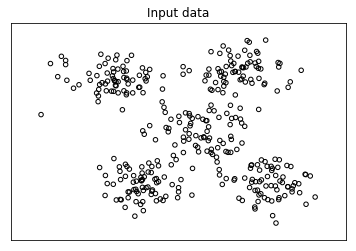

In [23]:
# Import the following packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

# Load input data
X = np.loadtxt('C:\\Users\\HP\\OneDrive\\GitHub\\Artificial-Intelligence-with-Python\\Chapter 04\\code\\data_clustering.txt', delimiter=',')

# We need to define the number of clusters before we can apply K-Means algorithm:
num_clusters = 5



# Visualize the input data to see what the spread looks like:
# Plot input data
plt.figure()
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black', s=20)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())



Now, Instead of selecting them randomly, we use kmeans++ to select these centers in a smarter way. This ensures that the
algorithm converges quickly. The n_clusters parameter refers to the
number of clusters. The n_init parameter refers to the number of
times the algorithm should run before deciding upon the best outcome:

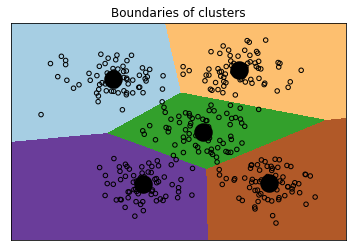

In [24]:
# Create KMeans object 
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

# Train the KMeans clustering model
kmeans.fit(X)

# To visualize the boundaries, we need to create a grid of points and evaluate the model on all those points. Let’s define the step size of this
# grid:
# Step size of the mesh
step_size = 0.01


#We define the grid of points and ensure that we are covering all the values in our input data:
# Define the grid of points to plot the boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_vals, y_vals = np.meshgrid(np.arange(x_min, x_max, step_size), 
        np.arange(y_min, y_max, step_size))

# Predict the outputs for all the points on the grid using the trained KMeans model:
output = kmeans.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

# Plot different regions and color them 
output = output.reshape(x_vals.shape)
plt.figure()
plt.clf()
plt.imshow(output, interpolation='nearest',
           extent=(x_vals.min(), x_vals.max(), 
               y_vals.min(), y_vals.max()),
           cmap=plt.cm.Paired, 
           aspect='auto', 
           origin='lower')

# Overlay input data points on top of these colored regions:
plt.scatter(X[:,0], X[:,1], marker='o', facecolors='none', edgecolors='black', s=20)

# Plot the centers of the clusters obtained using the K-Means algorithm:
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], 
        marker='o', s=210, linewidths=4, color='black', 
        zorder=12, facecolors='black')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Boundaries of clusters')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


## Estimating the number of clusters with Mean Shift algorithm

Mean Shift is a powerful algorithm used in unsupervised learning. It is a non-parametric algorithm used frequently for clustering. It is nonparametric because it does not make any assumptions about the
underlying distributions. Mean Shift finds a lot of applications in fields like object tracking and real-time data analysis.

In the Mean Shift algorithm, we consider the whole feature space as a probability density function. We start with the training dataset and assume that they have been sampled from a probability density function. In this framework, the clusters correspond to the local maxima of the underlying distribution. If there are K clusters, then there are K peaks in the underlying data distribution and Mean Shift will identify those peaks.

The goal of Mean Shift is to identify the location of centroids. For each data point in the training dataset, it defines a window around it. It then computes the centroid for this window and updates the location to this
new centroid. It then repeats the process for this new location by defining a window around it. As we keep doing this, we move closer to the peak of the cluster. Each data point will move towards the cluster it
belongs to. The movement is towards a region of higher density. We keep shifting the centroids, also called means, towards the peaks of each cluster. Since we keep shifting the means, it is called Mean Shift! We keep doing this until the algorithm converges, at which stage the centroids don’t move anymore.
Let’s see how to use MeanShift to estimate the optimal number of clusters in the given dataset. We will be using data in the data_clustering.txt file for analysis. It is the same file we used in the KMeans section.


Centers of clusters:
 [[2.95568966 1.95775862]
 [7.20690909 2.20836364]
 [2.17603774 8.03283019]
 [5.97960784 8.39078431]
 [4.99466667 4.65844444]]

Number of clusters in input data = 5


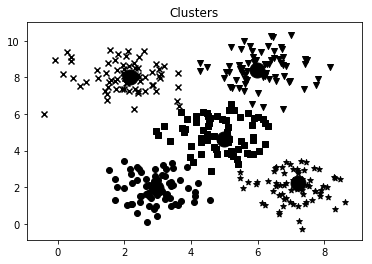

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

# Load input data
X = np.loadtxt('C:\\Users\\HP\\OneDrive\\GitHub\\Artificial-Intelligence-with-Python\\Chapter 04\\code\\data_clustering.txt', delimiter=',')

# Estimate the bandwidth of X
# Estimate the bandwidth of the input data. Bandwidth is a parameter of the underlying kernel density estimation process used in Mean Shift
# algorithm. The bandwidth affects the overall convergence rate of the algorithm and the number of clusters that we will end up with in the
# end. Hence this is a crucial parameter. If the bandwidth is small, it might results in too many clusters, where as if the value is large, then it
# will merge distinct clusters.
# The quantile parameter impacts how the bandwidth is estimated. A higher value for quantile will increase the estimated bandwidth,
# resulting in a lesser number of clusters:



bandwidth_X = estimate_bandwidth(X, quantile=0.1, n_samples=len(X))

# train the Mean Shift clustering model using the estimated bandwidth:
# Cluster data with MeanShift
meanshift_model = MeanShift(bandwidth=bandwidth_X, bin_seeding=True)
meanshift_model.fit(X)

# Extract the centers of clusters
cluster_centers = meanshift_model.cluster_centers_
print('\nCenters of clusters:\n', cluster_centers)

# Estimate the number of clusters
labels = meanshift_model.labels_
num_clusters = len(np.unique(labels))
print("\nNumber of clusters in input data =", num_clusters)

# Plot the points and cluster centers
plt.figure()
markers = 'o*xvs'
for i, marker in zip(range(num_clusters), markers):
    # Plot points that belong to the current cluster
    plt.scatter(X[labels==i, 0], X[labels==i, 1], marker=marker, color='black')

    # Plot the cluster center
    cluster_center = cluster_centers[i]
    plt.plot(cluster_center[0], cluster_center[1], marker='o', 
            markerfacecolor='black', markeredgecolor='black', 
            markersize=15)

plt.title('Clusters')
plt.show()


## Estimating the quality of clustering with silhouette scores

Silhouette refers to a method used to check the consistency of clusters in our data. It gives an estimate of how well each data point fits with its cluster. The silhouette score is a metric that measures how similar a
data point is to its own cluster, as compared to other clusters. The silhouette score works with any similarity metric.
For each data point, the silhouette score is computed using the following formula:
$$silhouette score = (p - q) / max(p, q)$$ 
$$silhouette score \in [-1,1]$$ 
in which p is the mean distance to the points in the nearest cluster that the data point is not a part of, and q is the mean intra-cluster distance to all the points in its own cluster.


A score closer to 1 indicates that the data point is very similar to other data points in the cluster, whereas a score closer to -1 indicates that the data point is not similar to the data points in its cluster. 
One way to think about it is if you get too many points with negative silhouette scores, then we may have too few or too many clusters in our data. We need to run the clustering algorithm again to find the optimal number of clusters.

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Input data')

(-1.5, 12.38)

(-0.4, 10.96)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

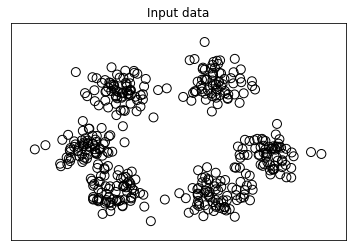

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

# Load data from input file
X = np.loadtxt('C:\\Users\\HP\\OneDrive\\GitHub\\Artificial-Intelligence-with-Python\\Chapter 04\\code\\data_quality.txt', delimiter=',')

# Plot input data
plt.figure()
plt.scatter(X[:,0], X[:,1], color='black', s=80, marker='o', facecolors='none')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


Number of clusters = 2
Silhouette score = 0.47762624870454473


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


Number of clusters = 3
Silhouette score = 0.5471742411734871


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


Number of clusters = 4
Silhouette score = 0.579480188968759


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


Number of clusters = 5
Silhouette score = 0.5890032635647954


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


Number of clusters = 6
Silhouette score = 0.6096904118954452


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


Number of clusters = 7
Silhouette score = 0.5531506134707689


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


Number of clusters = 8
Silhouette score = 0.48951631150903685


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


Number of clusters = 9
Silhouette score = 0.4506514033960171


<Figure size 432x288 with 0 Axes>

<BarContainer object of 8 artists>

Text(0.5, 1.0, 'Silhouette score vs number of clusters')


Optimal number of clusters = 6


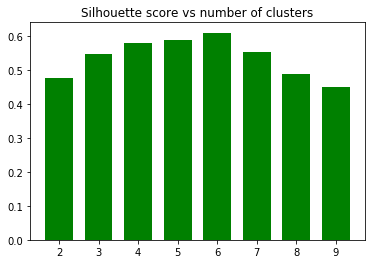

In [32]:
# Initialize variables
# Initialize the variables. The values array will contain a list of values we
# want to iterate on and find the optimal number of clusters:

scores = []
values = np.arange(2, 10)

# Iterate through the defined range
# Iterate through all the values and build a K-Means model during each iteration:



for num_clusters in values:
    # Train the KMeans clustering model
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(X)
# Estimate the silhouette score for the current clustering model using Euclidean distance metric:    
    
    score = metrics.silhouette_score(X, kmeans.labels_, 
                metric='euclidean', sample_size=len(X))
# Print the silhouette score for the current value:
    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)
                    
    scores.append(score)
#Visualize the silhouette scores for various values:
# Plot silhouette scores
plt.figure()
plt.bar(values, scores, width=0.7, color='green', align='center')
plt.title('Silhouette score vs number of clusters')

# Extract best score and optimal number of clusters
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)

plt.show()


## Gaussian Mixture Models

A Mixture Model is a type of probability density model where we assume that the data is governed by a number of component distributions. If these distributions are Gaussian, then the model becomes a Gaussian Mixture Model. These component distributions are combined in order to provide a multimodal density function, which becomes a mixture model.



GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

<Figure size 432x288 with 0 Axes>

Accuracy on training data = 33.33333333333333
Accuracy on testing data = 33.33333333333333


Text(0.5, 1.0, 'GMM classifier')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

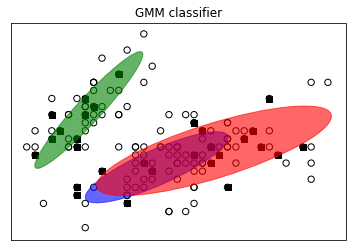

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

from sklearn import datasets
#from sklearn.mixture import GMM
#from sklearn.cross_validation import StratifiedKFold
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
#from sklearn.mixture import GMM
from sklearn import mixture


colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')







# Load the iris dataset
iris = datasets.load_iris()

# Split dataset into training and testing (80/20 split)
kfold= StratifiedKFold(n_splits=5)




# Take the first fold
#train_index, test_index = next(iter(indices))

train_index, test_index = next(iter(kfold.split(iris.data, iris.target)))
# Extract training data and labels
X_train = iris.data[train_index]
y_train = iris.target[train_index]

# Extract testing data and labels
X_test = iris.data[test_index]
y_test = iris.target[test_index]

# Extract the number of classes
num_classes = len(np.unique(y_train))

# Build GMM


classifier = GaussianMixture(n_components=num_classes,                          
                             
                             covariance_type='full')
classifier
# Initialize the GMM means 
classifier.means_ = np.array([X_train[y_train == i].mean(axis=0)
                              for i in range(num_classes)])

# Train the GMM classifier 
classifier.fit(X_train)

# Draw boundaries
plt.figure()
colors = 'bgr'
for i, color in enumerate(colors):
    # Extract eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(
            classifier.covariances_[i][:2, :2])

   
    
    
    # Normalize the first eigenvector
    norm_vec = eigenvectors[0] / np.linalg.norm(eigenvectors[0])

    # Extract the angle of tilt
    angle = np.arctan2(norm_vec[1], norm_vec[0])
    angle = 180 * angle / np.pi 

    # Scaling factor to magnify the ellipses
    # (random value chosen to suit our needs)
    scaling_factor = 8
    eigenvalues *= scaling_factor 

    # Draw the ellipse
    ellipse = patches.Ellipse(classifier.means_[i, :2], 
            eigenvalues[0], eigenvalues[1], 180 + angle, 
            color=color)
    axis_handle = plt.subplot(1, 1, 1)
    ellipse.set_clip_box(axis_handle.bbox)
    ellipse.set_alpha(0.6)
    axis_handle.add_artist(ellipse)

# Plot the data 
colors = 'bgr'
for i, color in enumerate(colors):
    cur_data = iris.data[iris.target == i]
    plt.scatter(cur_data[:,0], cur_data[:,1], marker='o', 
            facecolors='none', edgecolors='black', s=40, 
            label=iris.target_names[i])

    test_data = X_test[y_test == i]
    plt.scatter(test_data[:,0], test_data[:,1], marker='s', 
            facecolors='black', edgecolors='black', s=40, 
            label=iris.target_names[i])

# Compute predictions for training and testing data
y_train_pred = classifier.predict(X_train)
accuracy_training = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
print('Accuracy on training data =', accuracy_training)
         
y_test_pred = classifier.predict(X_test)
accuracy_testing = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
print('Accuracy on testing data =', accuracy_testing)

plt.title('GMM classifier')
plt.xticks(())
plt.yticks(())

plt.show()